<a href="https://colab.research.google.com/github/Bappy60/ML_Assignment/blob/main/Contour%20Plot/contour_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Author Name : Kawsar Ahemmed Bappy*

*Registration Number : 2018831060*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install google-colab
import google.colab.drive as drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Uni_linear.txt'

# Read the CSV file
data = pd.read_csv(file_path, header=None)

In [4]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


# Data Visualization

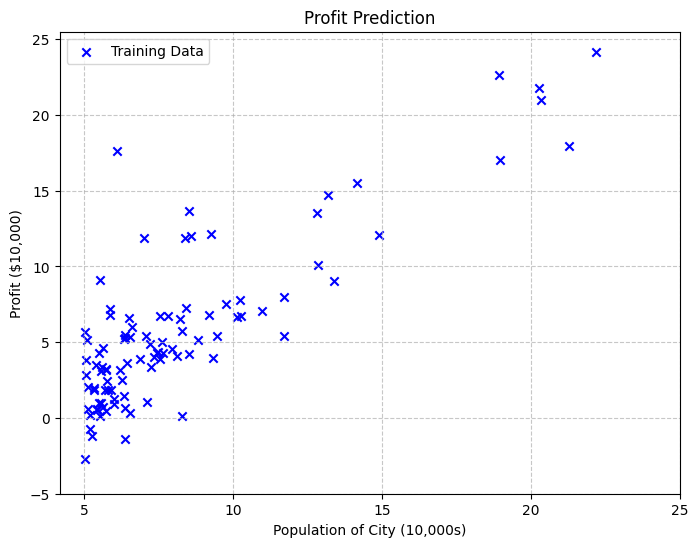

In [15]:
plt.figure(figsize=(8, 6))

# Scatter plot with blue color and markers
plt.scatter(data[0], data[1], color='blue', marker='x', label='Training Data')

# Customize ticks
plt.xticks(np.arange(5, 30, step=5))
plt.yticks(np.arange(-5, 30, step=5))

# Labeling and title
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Prediction")

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Show the plot
plt.show()


# Cost Function

In [16]:
def computeCost(X,y,theta):
    number_of_data = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y) ** 2

    # Use np.sum directly without multiplying by 1/(2*number_of_data) for simplicity
    cost = np.sum(square_err) / (2 * number_of_data)

    return cost

In [17]:
data_n=data.values
m=data_n[:,0].size
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

computeCost(X,y,theta)

32.072733877455676

#Gradient Descent

In [18]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = X.transpose().dot(predictions - y)
        descent = alpha * (1 / m) * error
        theta -= descent
        J_history.append(computeCost(X, y, theta))

    return theta, J_history


In [19]:
theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.63 + 1.17x1


In [20]:
from mpl_toolkits.mplot3d import Axes3D

In [21]:
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

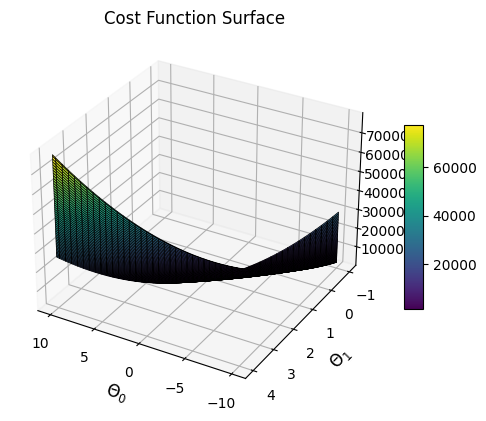

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Change color by specifying the color parameter
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap="viridis", edgecolor='k', linewidth=0.5)

# Customize axis labels and title
ax.set_xlabel(r'$\Theta_0$', fontsize=12)
ax.set_ylabel(r'$\Theta_1$', fontsize=12)
ax.set_zlabel(r'$J(\Theta)$', fontsize=12)
ax.set_title('Cost Function Surface')

# Adjust the view angle
ax.view_init(30, 120)

# Add colorbar for reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Show the plot
plt.show()


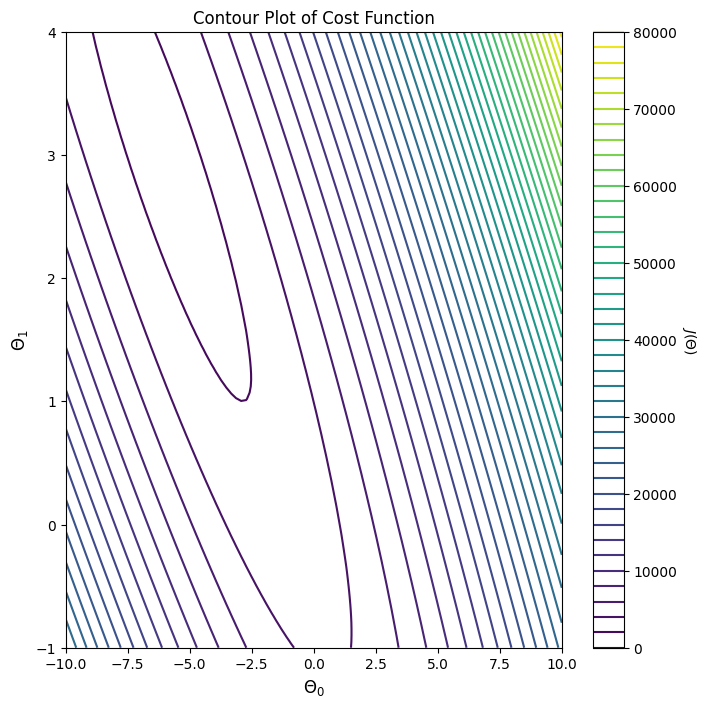

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))

# Create a filled contour plot with specified levels
contour = ax.contour(theta0_vals, theta1_vals, J_vals, levels=50, cmap='viridis')

# Add labels and title
plt.xlabel(r'$\Theta_0$', fontsize=12)
plt.ylabel(r'$\Theta_1$', fontsize=12)
plt.title('Contour Plot of Cost Function')

# Add colorbar for reference
colorbar = plt.colorbar(contour, ax=ax)
colorbar.set_label('$J(\Theta)$', rotation=270, labelpad=15)

# Show the plot
plt.show()
